In [9]:
from plot_utils import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df1 = pd.read_csv('strong_scaling.csv')
df2 = pd.read_csv('ep_or_tp.csv')

df = pd.concat([df1,df2])

process(df)

df = remove_duplicates_and_sort(df)

Before pruning:  808
After pruning:  666


In [18]:
df['Model Name'].unique()

array(['Qwen/Qwen3-14B', 'Qwen/Qwen3-235B-A22B-FP8', 'Qwen/Qwen3-32B',
       'Qwen/Qwen3-8B', 'deepseek-ai/DeepSeek-R1-0528',
       'meta-llama/Llama-3.1-8B-Instruct',
       'meta-llama/Llama-3.3-70B-Instruct',
       'meta-llama/Llama-4-Scout-17B-16E',
       'meta-llama/Llama-4-Scout-17B-16E-Instruct',
       'mistralai/Ministral-8B-Instruct-2410',
       'mistralai/Mistral-Small-3.1-24B-Instruct-2503',
       'mistralai/Mixtral-8x22B-Instruct-v0.1',
       'mistralai/Mixtral-8x7B-Instruct-v0.1',
       'nvidia/Llama-3_3-Nemotron-Super-49B-v1', 'google/gemma-2-9b-it'],
      dtype=object)

In [19]:
df = df[df['Model Name'] != 'google/gemma-2-9b-it']

In [20]:
df.keys()

Index(['active_energy', 'total_energy', 'active_power_avg',
       'active_power_peak', 'active_power_p50', 'active_power_p95',
       'total_power_avg', 'total_power_peak', 'total_power_p50',
       'total_power_p95', 'active_gpu_util_avg', 'active_gpu_util_peak',
       'active_gpu_util_p50', 'active_gpu_util_p95', 'active_mem_avg',
       'active_mem_peak', 'active_mem_p50', 'active_mem_p95', 'total_mem_avg',
       'total_mem_peak', 'total_mem_p50', 'total_mem_p95',
       'total_gpu_util_avg', 'total_gpu_util_peak', 'total_gpu_util_p50',
       'total_gpu_util_p95', 'In Tokens Total', 'In Tokens Avg',
       'In Tokens P50', 'In Tokens P95', 'In Tokens Max', 'In Tokens Min',
       'Out Tokens Total', 'Out Tokens Avg', 'Out Tokens P50',
       'Out Tokens P95', 'Out Tokens Max', 'Out Tokens Min',
       'Latency Total (s)', 'Latency Avg (s)', 'Latency P50 (s)',
       'Latency P95 (s)', 'Latency Max (s)', 'Latency Min (s)', 'TTFT Avg (s)',
       'TTFT P50 (s)', 'TTFT P95 (s)', 'T

In [21]:
df_tp4 = df[df['TP Size'] == 4]

metric = 'Throughput (in+out) tok/s'
df_tp4[f"{metric} per GPU"] = df_tp4[metric] / df_tp4["Total GPUs"]

df_tp4

/tmp/ipykernel_545635/3796184143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tp4[f"{metric} per GPU"] = df_tp4[metric] / df_tp4["Total GPUs"]


,active_energy,total_energy,active_power_avg,active_power_peak,active_power_p50,active_power_p95,total_power_avg,total_power_peak,total_power_p50,total_power_p95,...,Total GPUs,# params,active params,Throughput per Watt,Throughput per User,Model Name Short,Hardware Type Short,Config,Config EP,Throughput (in+out) tok/s per GPU
308,152286.020865,152286.020865,3807.125000,4811.000,3849.0000,4255.75000,3807.125000,4811.000,3849.0000,4255.75000,...,8,14,14.0,3.734557,222.155056,Qwen3 14B,AMD MI300X,"TP: 4, DP: 2","TP: 4, EP: 1",1777.240446
312,123910.000118,123910.000118,3812.615385,4778.000,3892.0000,4261.40000,3812.615385,4778.000,3892.0000,4261.40000,...,8,14,14.0,4.604319,137.144507,Qwen3 14B,AMD MI300X,"TP: 4, DP: 2","TP: 4, EP: 1",2194.312110
316,106687.000000,106687.000000,3879.527273,4791.000,3997.0000,4642.10000,3879.527273,4791.000,3997.0000,4642.10000,...,8,14,14.0,5.357198,81.185146,Qwen3 14B,AMD MI300X,"TP: 4, DP: 2","TP: 4, EP: 1",2597.924660
320,97201.000580,97201.000580,3888.040000,4691.000,4032.5000,4619.85000,3888.040000,4691.000,4032.5000,4619.85000,...,8,14,14.0,5.916068,44.925603,Qwen3 14B,AMD MI300X,"TP: 4, DP: 2","TP: 4, EP: 1",2875.238566
306,139701.000000,139701.000000,3070.351648,4596.000,3108.0000,3447.50000,3070.351648,4596.000,3108.0000,3447.50000,...,8,14,14.0,4.048242,194.211372,Qwen3 14B,AMD MI300X,"TP: 4, DP: 2","TP: 4, EP: 1",1553.690976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,117765.970500,117765.970500,1591.432034,2111.100,1588.9325,1802.25535,1591.432034,2111.100,1588.9325,1802.25535,...,4,49,49.0,4.748653,118.080608,Llama 3_3 Nemotron Super 49B v1,NVIDIA H100,"TP: 4, DP: 1","TP: 4, EP: 1",1889.289721
459,97210.421000,97210.421000,1720.538425,2402.538,1736.6680,1973.33840,1720.538425,2402.538,1736.6680,1973.33840,...,4,49,49.0,5.774460,77.618599,Llama 3_3 Nemotron Super 49B v1,NVIDIA H100,"TP: 4, DP: 1","TP: 4, EP: 1",2483.795165
461,87999.720000,87999.720000,1795.912653,2394.896,1843.8920,2293.41400,1795.912653,2394.896,1843.8920,2293.41400,...,4,49,49.0,6.410072,44.968472,Llama 3_3 Nemotron Super 49B v1,NVIDIA H100,"TP: 4, DP: 1","TP: 4, EP: 1",2877.982219
463,84663.834000,84663.834000,1801.358170,2399.717,1780.1140,2308.68835,1801.358170,2399.717,1780.1140,2308.68835,...,4,49,49.0,6.690537,23.539167,Llama 3_3 Nemotron Super 49B v1,NVIDIA H100,"TP: 4, DP: 1","TP: 4, EP: 1",3013.013321


In [22]:
def filter_best_configs(df, metric, agg = 'max'):
    best_df = df.groupby(['Model Name','Hardware Type Short', 'Precision', 'Total Batch Size', 'Total GPUs', '# params', 'MoE']).agg({metric:agg}).reset_index()
    best_df[metric + ' per GPU'] = best_df[metric] / best_df['Total GPUs']
    return best_df


df = df[(df['Total Batch Size'] >= 128) & (df['Total Batch Size'] <= 1024)]

metric = 'Throughput (in+out) tok/s'
df[f"{metric} per GPU"] = df[metric] / df["Total GPUs"]

df_best_tp = filter_best_configs(df, f"{metric} per GPU")
df_best_tp

,Model Name,Hardware Type Short,Precision,Total Batch Size,Total GPUs,# params,MoE,Throughput (in+out) tok/s per GPU,Throughput (in+out) tok/s per GPU per GPU
0,Qwen/Qwen3-14B,AMD MI300X,bfloat16,128.0,8,14,False,2082.114474,260.264309
1,Qwen/Qwen3-14B,AMD MI300X,bfloat16,256.0,8,14,False,2741.939583,342.742448
2,Qwen/Qwen3-14B,AMD MI300X,bfloat16,512.0,8,14,False,3334.001897,416.750237
3,Qwen/Qwen3-14B,AMD MI300X,bfloat16,1024.0,8,14,False,3651.650769,456.456346
4,Qwen/Qwen3-14B,AMD MI300X,fp8,128.0,8,14,False,2237.094962,279.636870
...,...,...,...,...,...,...,...,...,...
153,nvidia/Llama-3_3-Nemotron-Super-49B-v1,NVIDIA H100,bfloat16,1024.0,4,49,False,2747.238543,686.809636
154,nvidia/Llama-3_3-Nemotron-Super-49B-v1,NVIDIA H100,fp8,128.0,4,49,False,2483.795165,620.948791
155,nvidia/Llama-3_3-Nemotron-Super-49B-v1,NVIDIA H100,fp8,256.0,4,49,False,2877.982219,719.495555
156,nvidia/Llama-3_3-Nemotron-Super-49B-v1,NVIDIA H100,fp8,512.0,4,49,False,3163.252156,790.813039


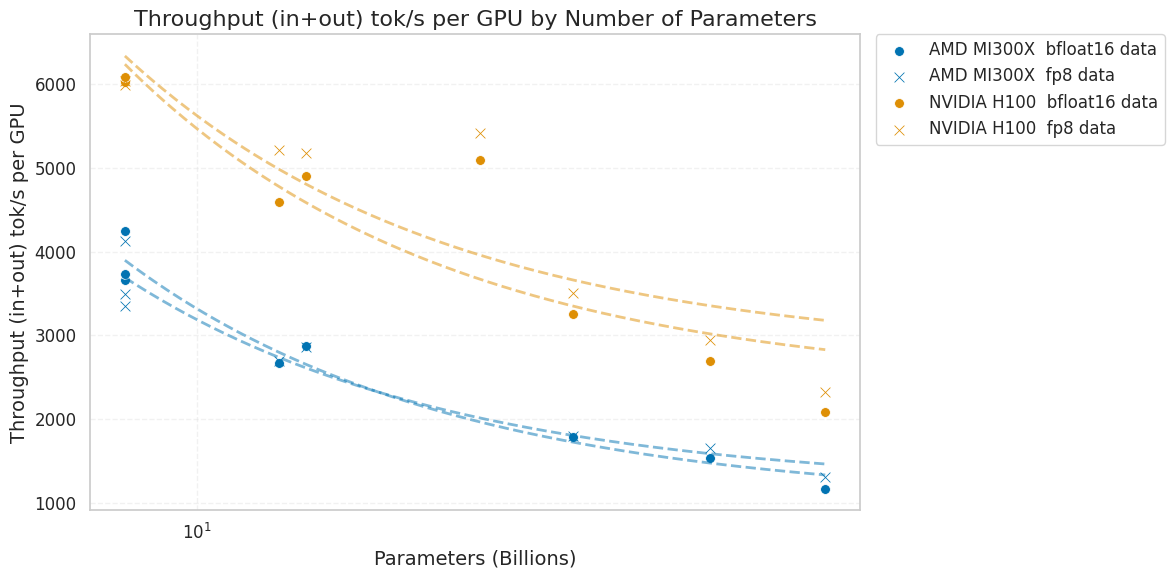

In [ ]:
df_tp4 = df_tp4[df_tp4['Total Batch Size'] == 256]

plot_trend(df_tp4, f"{metric} per GPU")
#plt.savefig(f'weak_scaling_{hw}.png')
plt.show()